<center>
<h1>CSCI3151 - Foundations of Machine Learning</h1>
<h2>Assignment 4</h2>

<b> Due on: April 10, 2024 at 23:59 ADT</b>

<small>(One submission per group, and you must list all group members at the top of that submission)</small>
</center>

[Assignment Submission Instructions](https://docs.google.com/document/d/1iHzvkaZzNyZJ54Qw4eXJYOC2vzQUPliMyEBbZVRiS4Q/edit?usp=sharing)

### Group Members:

1.Tianzheng Hou B00889272

2.Leon Vermaak B00894772

3.Shuqiang Zhang B00908762

## **1. Multivariate Gaussians and k-means**

We're going to generate a dataset of Multivariate Gaussians and cluster it using the k-means algorithm. We will then use the silhouette score to evaluate the clustering.


**a**) Create and plot a dataset using only `numpy` and `matplotlib` that looks similar to the following graph.

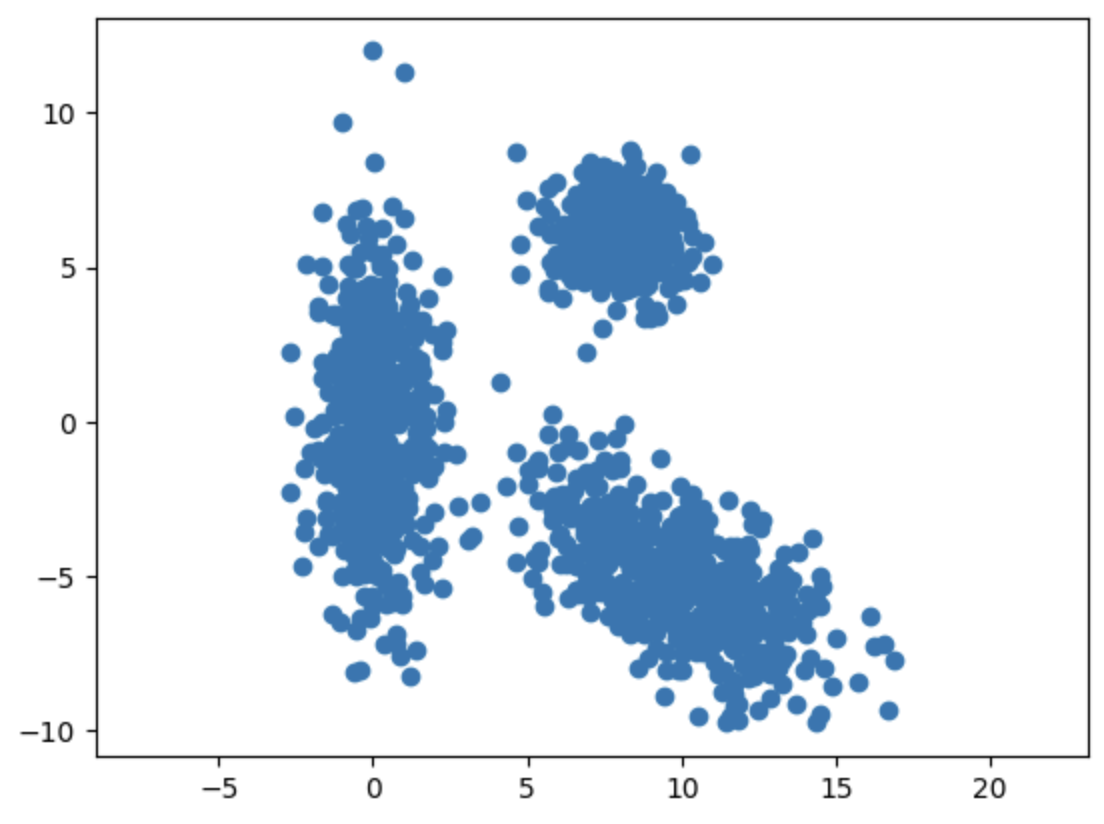

<ipython-input-10-b9511962d07e>:15: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data3 = np.random.multivariate_normal(center3, cov3, size=500)


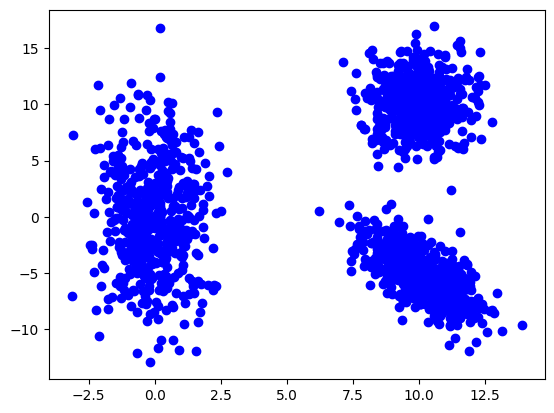

In [ ]:
# Your dataset code
import numpy as np
import matplotlib.pyplot as plt

center1 = (10,10)
center2 = (0,0)
center3 = (10,-5)

cov1 = [[1, 0], [0, 5]]
cov2 = [[1, 0], [0, 20]]
cov3 = [[2, -5], [0, 2]]

data1 = np.random.multivariate_normal(center1, cov1, size=500)
data2 = np.random.multivariate_normal(center2, cov2, size=500)
data3 = np.random.multivariate_normal(center3, cov3, size=500)

x1, y1 = data1[:, 0], data1[:, 1]
x2, y2 = data2[:, 0], data2[:, 1]
x3, y3 = data3[:,0], data3[:,1]

plt.scatter(x1, y1, color='blue')
plt.scatter(x2, y2, color='blue')
plt.scatter(x3, y3, color='blue')
plt.show()

**b**) Write your own k-means algorithm (implement from scratch using `numpy`, not using `sklearn` or other libraries) without using class as a feature.

A few implementation notes:

1. Initialize your cluster centers to be somewhere within the range encompassed by your dataset.
2. Calculate the silhouette score for each $k$ and print the value.

You might find the following resources helpful for learning about silhouette scores:

* https://www.youtube.com/watch?v=AtxQ0rvdQIA
* https://www.youtube.com/watch?v=DzrvLpxTxJw
* https://en.wikipedia.org/wiki/Silhouette_(clustering)#:~:text=The%20silhouette%20score%20is%20specialized,distance%20or%20the%20Manhattan%20distance
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

but for this question you can use [sklearn's silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) function.


In [ ]:
from sklearn.metrics import silhouette_score

def kmeans(X, k, max_iters=100):
    # Your k-Means function
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for _ in range(max_iters):
      distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
      labels = np.argmin(distances, axis=1)
      centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

    #Calcualte and print the Silhouette score
    score = None
    if k>1:
      score = silhouette_score(X, labels)
      #print(f"Score for k={k}: {score}")

    return centroids, labels, score

example = kmeans(data1, 3)
print(example[2])

0.37349861579682797


**c**) Use your k-means algorithm to cluster the dataset. Experiment with different numbers of clusters $k$ ranging from 2 to 6.

A few notes:
1. Make sure you plot the resulting assignments from your model (the data with the predicted class as the colour).
2. Include the $k$ value for each plot in the title of each plot.
3. Plot the initial and final cluster centers in such a way that is clear where the center for each cluster started and ended.
4. Make sure to run the algorithm for a reasonable number of iterations.

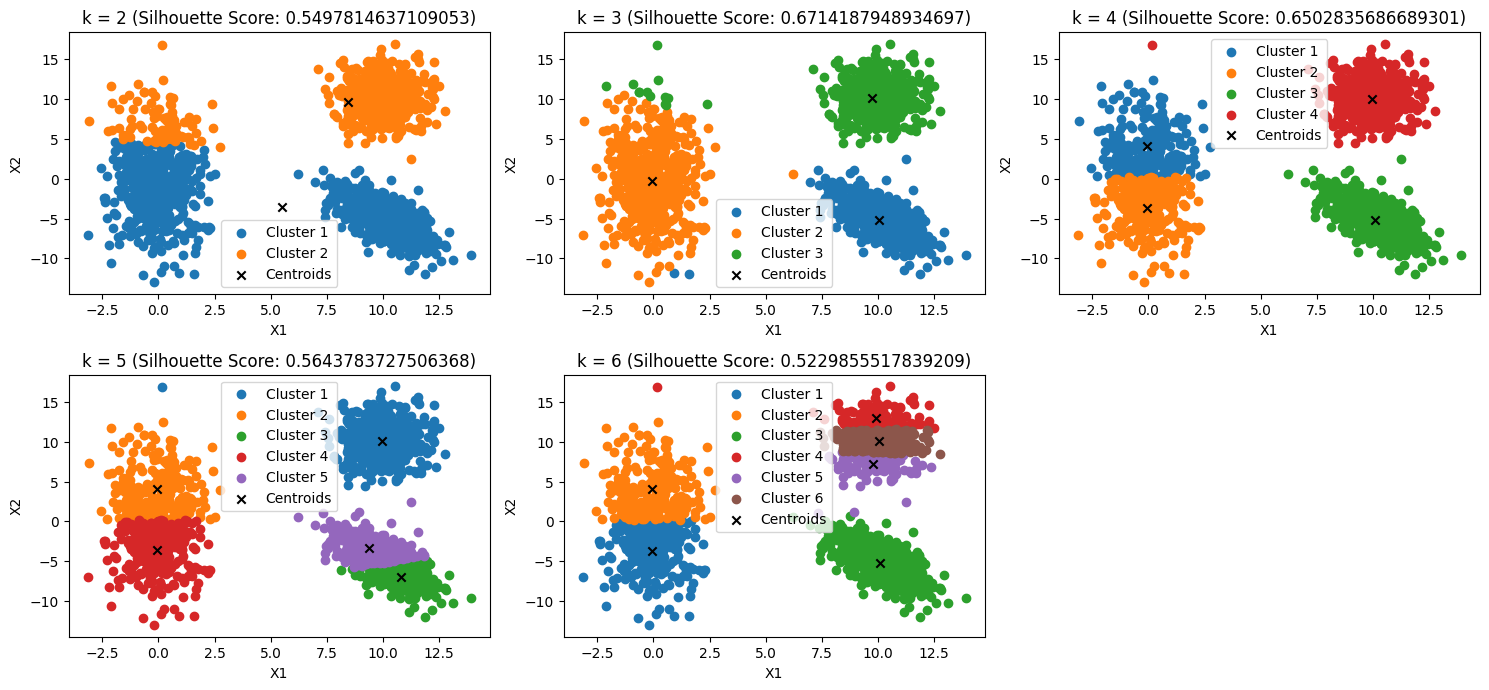

In [ ]:
# Run k-means and plot your results
X = np.concatenate([data1, data2, data3], axis=0)
k = range(2,7)
iterations = 1

plt.figure(figsize=(15, 10))

for idx, k in enumerate(k):

    #run kmeans for n iterations to choose the optimal silhouette score
    centroids, labels, score = kmeans(X, k)
    for _ in range(iterations):
      centroids_temp, labels_temp, score_temp = kmeans(X, k,)
      if score_temp > score:
        centroids, labels, score = centroids_temp, labels_temp, score_temp

    plt.subplot(3, 3, idx+1)
    for i in range(k):
        cluster_points = X[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', label='Centroids')

    plt.title(f'k = {k} (Silhouette Score: {score})')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()

plt.tight_layout()
plt.show()

**d**) Analyze your results below, including the information you gained from calculating the silhouette scores. Be sure to include any trends you may have noticed, optimal parameters you found, etc. Don't just state what you saw, explain your findings.


Using the silhouette score, we have found that k=3 is the optimal size. This matches what was expected, as a glance at the image gives the same impression. When looking at the other results, you can see how the score improves as it gets closer to 3 and worsens as it moves further away.

There is still something interesting going on with the algorithm that we don’t have the time to iron out. When k=3, the algorithm misclassifies points that, at a glance, are obviously part of a different cluster, such as with green or orange. There might be some more fine-tuning needed, but we feel that using this in combination with the k-nearest neighbors algorithm might also fix the issue.




